# Importing libraries and importing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

C:\Users\cocod\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

# Picking one digit from the dataset
<p>There are 70,000 images, and each image has 784 features. This is because each image is 28 X 28 pixels, and each feature simple represents one pixel's intensity from 0(white) to 255(black). Let's take a peek at one digit from the dataset</p>

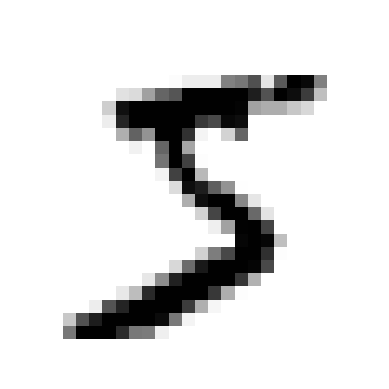

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [8]:
# the above image looks like a, to verify this:
y[0]

'5'

In [9]:
import numpy as np
# the given output was in string so by converting it into integer:
y = y.astype(np.uint8)

In [10]:
y[0]

5

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier
Creating a "5-detector"

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## Selecting SGD Classifier to train it
SGDClassifier class has the advantage of being capable of handling very large datasets efficiently. 

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

The classifier guesses that this image represents a 5(True).

# Performance Measures

## Measuring Accuracy using Cross-Validation

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

0.9669
0.91625
0.96785


### Example to understand the above code
<p>Imagine you
re building a model to classify emails as spam or not spam. Let's say you have 900 training examples</p>

<p>
    <ol>
        <li><strong>Stratified K-Fold: </strong>You split the data into 3 folds (300 examples each). Each fold will have a roughly equal proportion of spam and non-spam emails.</li>
        <li><strong>Fold 1: </strong><ul>
            <li>Train your model on folds 2 and 3(600 examples)</li>
            <li>Evaluate it on fold 1(300 examples), calculate and print the accuracy</li>
            </ul>
        </li>
        <li><strong>Fold 2:</strong><ul>
            <li>Train your model on folds 1 and 3(600 examples)</li>
            <li>Evaluate it on fold 2(300 examples), calculate and print the accuracy</li>
            </ul>
        </li>
        <li><strong>Fold 3:</strong><ul>
            <li>Train your model on folds 1 and 2(600 examples)</li>
            <li>Evaluate it on fold 3(300 examples), calculate and print the accuracy</li>
            </ul>
        </li>
</ol>
By the end, you'll have trained and evaluated your model 3 times, getting a better sense of its overall performance than if you had just done a single train-test split.
</p>

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### What happens under the hood:

<p>
    <ol>
        <li><strong>Data Splitting: </strong>cross_val_score automatically divides your training data (X_train, y_train_5) into 3 folds.</li>
        <li><strong>Iteration: </strong>It then iterates through these folds
        <ul>
            <li><strong>Fold 1:</strong>
                <ul>Trains sgd_clf on folds 2 and 3</ul>
                <ul>Evaluates the trained model on fold 1, calculates the accuracy.</ul>
            </li>
            <li><strong>Fold 2:</strong>
                 <ul>Trains sgd_clf on folds 1 and 3</ul>
                <ul>Evaluates the trained model on fold 2, calculates the accuracy.</ul>
            </li>
            <li><strong>Fold 3:</strong>
                 <ul>Trains sgd_clf on folds 1 and 2</ul>
                <ul>Evaluates the trained model on fold 3, calculates the accuracy.</ul>
            </li>
            </ul></li>
        <li><strong>Result: </strong>The function returns an array containing the accuracy scores from each of the 3 folds</li>
</ol>

</p>

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [23]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

### Precision and Recall

In [25]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### f1 score

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision/Recall tradeoff


In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [29]:
threshold = 0

In [30]:
y_some_digit_pred = (y_scores > threshold)

In [31]:
y_some_digit_pred

array([ True])

In [32]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

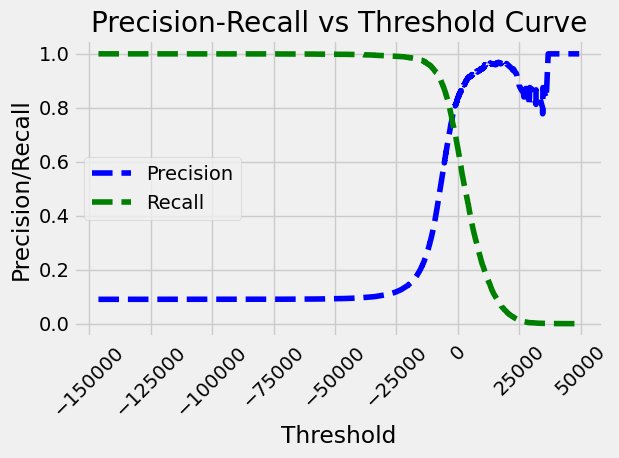

In [39]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Precision/Recall")
    plt.title("Precision-Recall vs Threshold Curve")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [40]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [41]:
threshold_90_precision

3370.0194991439594

In [42]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [43]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [44]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## ROC Curve

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


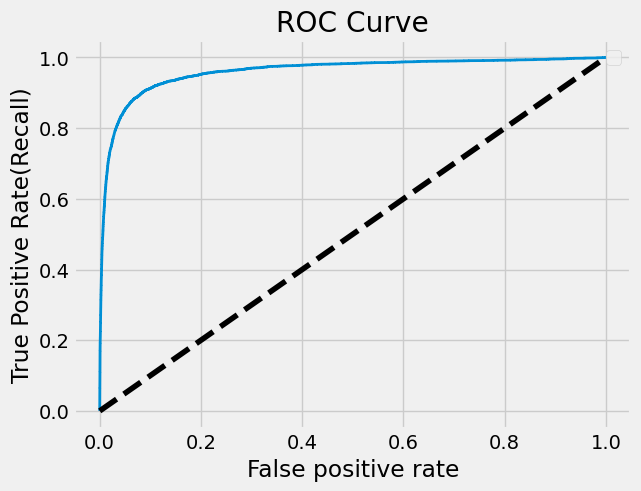

In [54]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--") # dashed diagonal
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive Rate(Recall)')
    plt.title("ROC Curve")
    plt.grid(True)
    plt.legend()
    
plot_roc_curve(fpr, tpr)
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [51]:
# comparing the result with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=4,
                                   method="predict_proba")

In [52]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

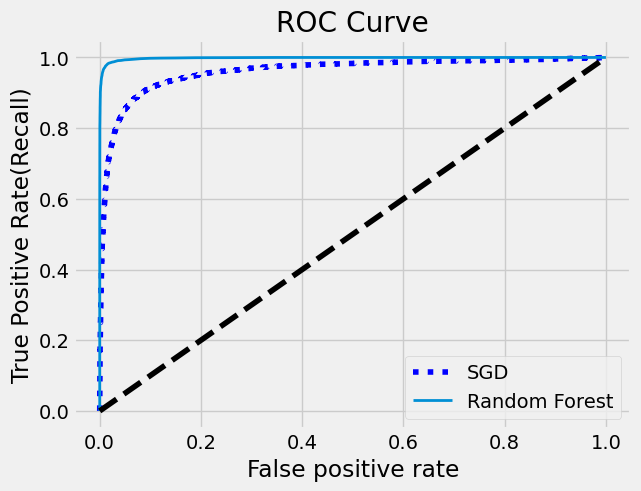

In [55]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [56]:
roc_auc_score(y_train_5, y_scores_forest)

0.9984268710591231

# Multiclass Classification

In [57]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [58]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [59]:
np.argmax(some_digit_scores)

5

In [60]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
svm_clf.classes_[5]

5

In [64]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [65]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [66]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [67]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis

In [70]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [71]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

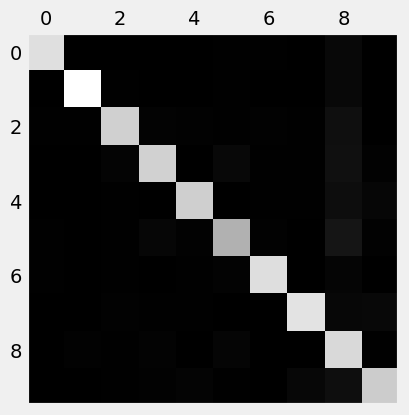

In [76]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.grid(False)
plt.show()

In [73]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

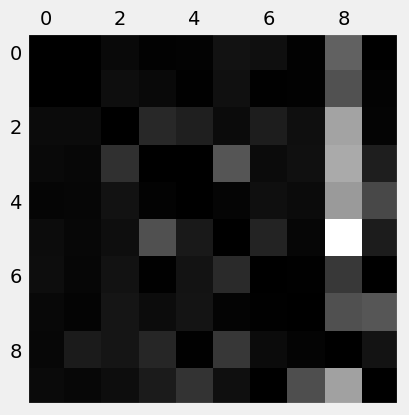

In [75]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.grid(False)
plt.show()